Librerias

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

DataFrame Business

In [5]:
business = pd.read_json('./data/yelp_academic_dataset_business.json', lines=True)
business.head(3) 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


DataFrame Review

In [6]:
reviews = pd.read_json('./data/chunks/yelp_review_chunk_0.json', lines=True)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [7]:
print(business.shape)
print(reviews.shape)

(150346, 14)
(100000, 9)


In [8]:
business.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [9]:
reviews.dtypes 

review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

DataFrame only Restaurants

In [10]:
restaurants = business[business.categories.fillna('-').str.lower().str.contains('restaurant')]
restaurants.shape 

(52286, 14)

In [11]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52286 entries, 3 to 150340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       52286 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52286 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720 non-null  object 
 12  categories    52286 non-null  object 
 13  hours         45007 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.0+ MB


In [12]:
restaurants.drop(['is_open','attributes','hours'], axis=1, inplace=True)

/var/folders/qt/kdl4y48j3kbc86ptv72_qyvw0000gn/T/ipykernel_43062/2487548758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants.drop(['is_open','attributes','hours'], axis=1, inplace=True)


In [13]:
restaurants['state'].unique()

array(['PA', 'TN', 'MO', 'FL', 'IN', 'AB', 'NV', 'IL', 'AZ', 'LA', 'NJ',
       'CA', 'DE', 'ID', 'NC', 'CO', 'HI', 'MT', 'XMS'], dtype=object)

In [15]:
ca_restaurants = restaurants[restaurants.state.str.contains('CA')]

print(ca_restaurants['state'].unique())
ca_restaurants.shape

['CA']


(1161, 11)

In [16]:
ca_restaurants.rename(columns={'stars':'avg_rating'}, inplace=True) 
print(ca_restaurants.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'avg_rating', 'review_count', 'categories'],
      dtype='object')


/var/folders/qt/kdl4y48j3kbc86ptv72_qyvw0000gn/T/ipykernel_43062/1286437619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_restaurants.rename(columns={'stars':'avg_rating'}, inplace=True)


In [17]:
df = reviews.merge(ca_restaurants, on = 'business_id')
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,avg_rating,review_count,categories
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"


In [18]:
df_clean = df.drop(columns=['text','useful','funny','cool'])
df_clean.head()

,review_id,user_id,business_id,stars,date,name,address,city,state,postal_code,latitude,longitude,avg_rating,review_count,categories
0,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,2016-07-25 07:31:06,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
1,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,2017-06-28 01:04:59,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
2,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,2017-01-14 23:31:35,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
3,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,2016-07-14 23:09:38,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"
4,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,2014-11-30 07:35:54,Hibachi Steak House & Sushi Bar,502 State St,Santa Barbara,CA,93101,34.416984,-119.695556,3.5,488,"Steakhouses, Sushi Bars, Restaurants, Japanese"


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   review_id     3031 non-null   object        
 1   user_id       3031 non-null   object        
 2   business_id   3031 non-null   object        
 3   stars         3031 non-null   int64         
 4   date          3031 non-null   datetime64[ns]
 5   name          3031 non-null   object        
 6   address       3031 non-null   object        
 7   city          3031 non-null   object        
 8   state         3031 non-null   object        
 9   postal_code   3031 non-null   object        
 10  latitude      3031 non-null   float64       
 11  longitude     3031 non-null   float64       
 12  avg_rating    3031 non-null   float64       
 13  review_count  3031 non-null   int64         
 14  categories    3031 non-null   object        
dtypes: datetime64[ns](1), float64(3), int6

In [20]:
rest_total = df_clean['name'].nunique()
user_total = df_clean['user_id'].nunique()
review_total = df_clean['review_id'].nunique()

print('Numero total de restaurantes: ', rest_total)
print('Numero total de usuarios: ', user_total)
print('Numero total de calificaciones: ', review_total)

Numero total de restaurantes:  94
Numero total de usuarios:  2826
Numero total de calificaciones:  3031


In [22]:
print('Ciudades donde se ubican los restaurantes:')
pd.DataFrame(sorted(df_clean['city'].unique()))

Ciudades donde se ubican los restaurantes:


,0
0,Carpinteria
1,Goleta
2,Isla Vista
3,Montecito
4,Santa Barbara


In [23]:

df_names = df_clean.drop_duplicates(subset='name', ignore_index=True)
unique_cities = sorted(df_names['city'].unique())
counts = df_names.groupby('city')['name'].nunique().sort_index()

unique_counts = {}
for value in unique_cities:
    count = counts.get(value, 0)
    unique_counts[value] = count
    
sorted_data = dict(sorted(unique_counts.items(), key=lambda item: item[1], reverse=True))

df_unique = pd.DataFrame({'Ciudad':sorted_data.keys(),
                        'Restaurantes':sorted_data.values()
                       })

print('Numero de restaurantes por ciudad:')
df_unique

Numero de restaurantes por ciudad:


,Ciudad,Restaurantes
0,Santa Barbara,57
1,Goleta,22
2,Carpinteria,10
3,Montecito,3
4,Isla Vista,2


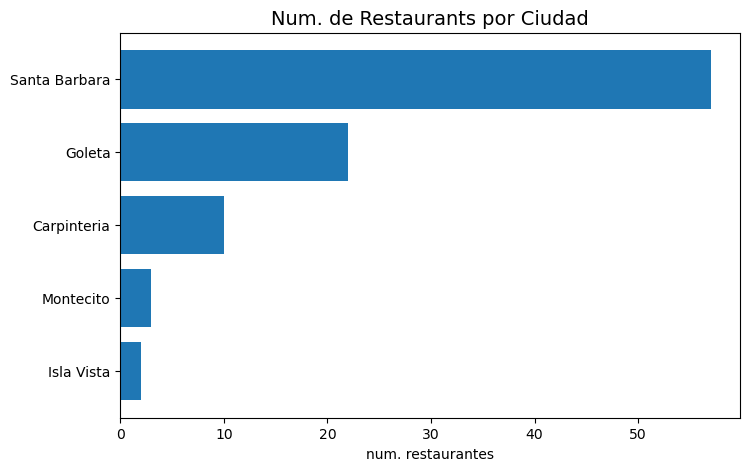

In [24]:
df_unique = df_unique.sort_values(by='Restaurantes', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(df_unique['Ciudad'], df_unique['Restaurantes'])

plt.title('Num. de Restaurants por Ciudad', size=14)
plt.xlabel('num. restaurantes')
plt.show()

In [26]:
revs_cnt = df_clean.groupby('review_count')['name'].unique().sort_index(ascending=False)

In [27]:
revs_cnt=revs_cnt.reset_index()
revs_cnt.head()

,review_count,name
0,2404,[Santa Barbara Shellfish Company]
1,1018,[Cold Spring Tavern]
2,885,[Padaro Beach Grill]
3,807,[Dawn Patrol]
4,768,[Bluewater Grill - Santa Barbara]


In [29]:
df_avgrevs = df_clean[['name','avg_rating', 'categories', 'review_count']]
df_popular = revs_cnt.merge(df_avgrevs, how='inner', on = 'review_count')

df_popular.head()

,review_count,name_x,name_y,avg_rating,categories
0,2404,[Santa Barbara Shellfish Company],Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."
1,2404,[Santa Barbara Shellfish Company],Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."
2,2404,[Santa Barbara Shellfish Company],Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."
3,2404,[Santa Barbara Shellfish Company],Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."
4,2404,[Santa Barbara Shellfish Company],Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."


In [30]:
df_popular.drop(['name_x'], axis=1, inplace=True)
df_popular.rename(columns={'name_y':'name'}, inplace=True)
df_popular.drop_duplicates(subset='name', inplace=True)

df_popular.head()

,review_count,name,avg_rating,categories
0,2404,Santa Barbara Shellfish Company,4.0,"Live/Raw Food, Restaurants, Seafood, Beer Bar,..."
351,1018,Cold Spring Tavern,4.5,"American (Traditional), Restaurants, Bars, Nig..."
522,885,Padaro Beach Grill,4.5,"American (Traditional), Restaurants, Seafood, ..."
656,807,Dawn Patrol,4.0,"Coffee & Tea, Breakfast & Brunch, Restaurants,..."
797,768,Bluewater Grill - Santa Barbara,4.0,"Seafood, Venues & Event Spaces, Cocktail Bars,..."


In [31]:
top_rest = df_popular.head(20)

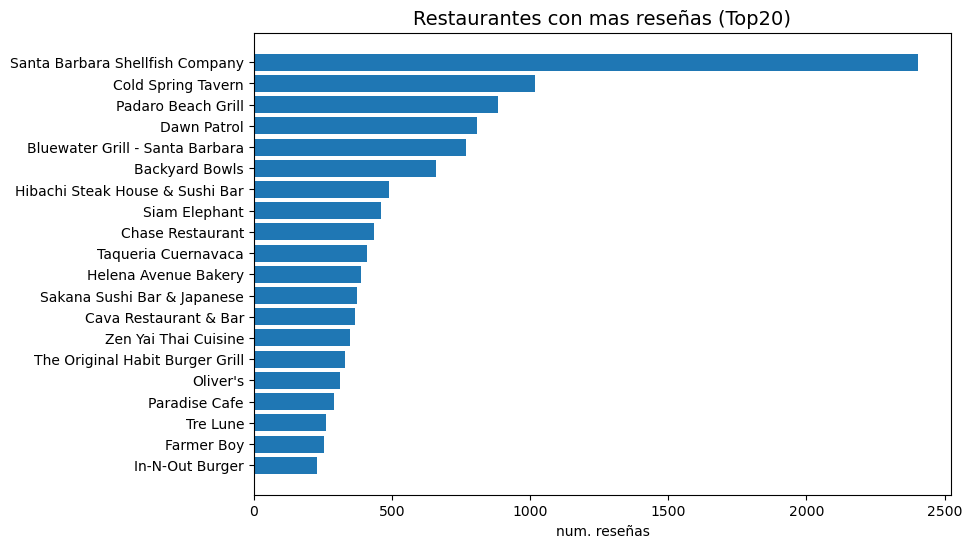

In [32]:
top_rest = top_rest.sort_values(by='review_count', ascending=True)

plt.figure(figsize=(9,6))
plt.barh(top_rest['name'], top_rest['review_count'])

plt.title('Restaurantes con mas reseñas (Top20)', size=14)
plt.xlabel('num. reseñas')
plt.show()

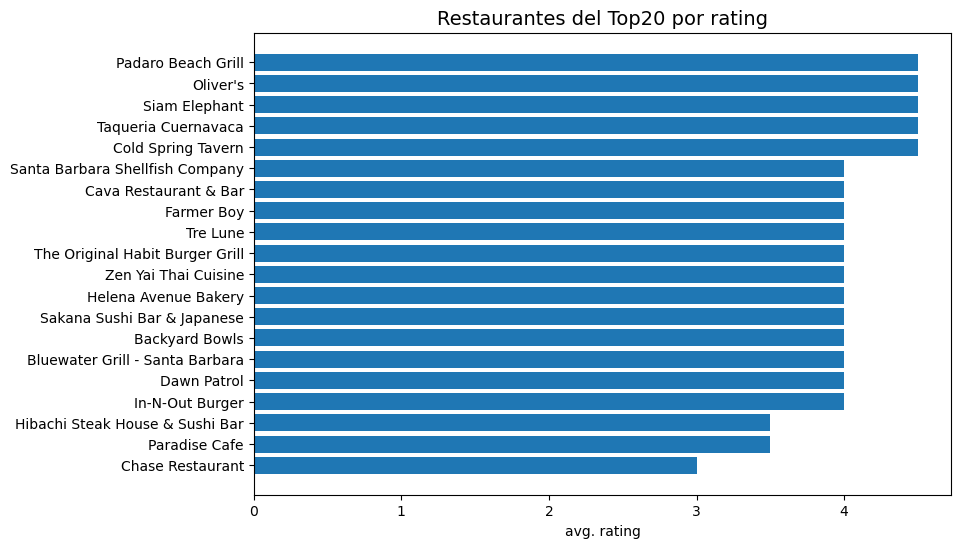

In [33]:
top_rest = top_rest.sort_values(by='avg_rating', ascending=True)

plt.figure(figsize=(9,6))
plt.barh(top_rest['name'], top_rest['avg_rating'])

plt.title('Restaurantes del Top20 por rating', size=14)
plt.xlabel('avg. rating')
plt.show()

In [34]:
categorias = top_rest['categories'].str.cat(sep=',')
categorias

'Event Planning & Services, Restaurants, Nightlife, Caterers, Italian, Bars,American (Traditional), American (New), Nightlife, Restaurants, Seafood, Cafes,Steakhouses, Sushi Bars, Restaurants, Japanese,Restaurants, Fast Food, Burgers,Coffee & Tea, Breakfast & Brunch, Restaurants, American (New), Food,Seafood, Venues & Event Spaces, Cocktail Bars, Restaurants, Nightlife, Breakfast & Brunch, American (Traditional), Event Planning & Services, Bars, American (New),Health Markets, Coffee & Tea, Ice Cream & Frozen Yogurt, Restaurants, Juice Bars & Smoothies, Breakfast & Brunch, Food, American (New), Specialty Food,Sushi Bars, Japanese, Restaurants,Food, Restaurants, Salad, Coffee & Tea, Breakfast & Brunch, Sandwiches, Bakeries,Thai, Restaurants, American (New), Pop-Up Restaurants, Asian Fusion,Fast Food, Burgers, Restaurants,Food, Italian, Restaurants,Breakfast & Brunch, Burgers, American (Traditional), American (New), Restaurants,Tapas Bars, Nightlife, Spanish, Latin American, Mexican, Brea

In [37]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 1.2 MB/s eta 0:00:00a 0:00:01m


In [38]:
from wordcloud import WordCloud, STOPWORDS 

In [39]:
# instantiate a word cloud object
stopwords = set(STOPWORDS)
category_cloud = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stopwords 
)

# exclude non relevant words
stopwords.add('Restaurants')
stopwords.add('Food')
stopwords.add('Nightlife')
stopwords.add('Spas')
stopwords.add('Venues')
stopwords.add('Event')
stopwords.add('Services')
stopwords.add('Locksmiths')
stopwords.add('Massage')

# create the word cloud
category_cloud.generate(categorias)

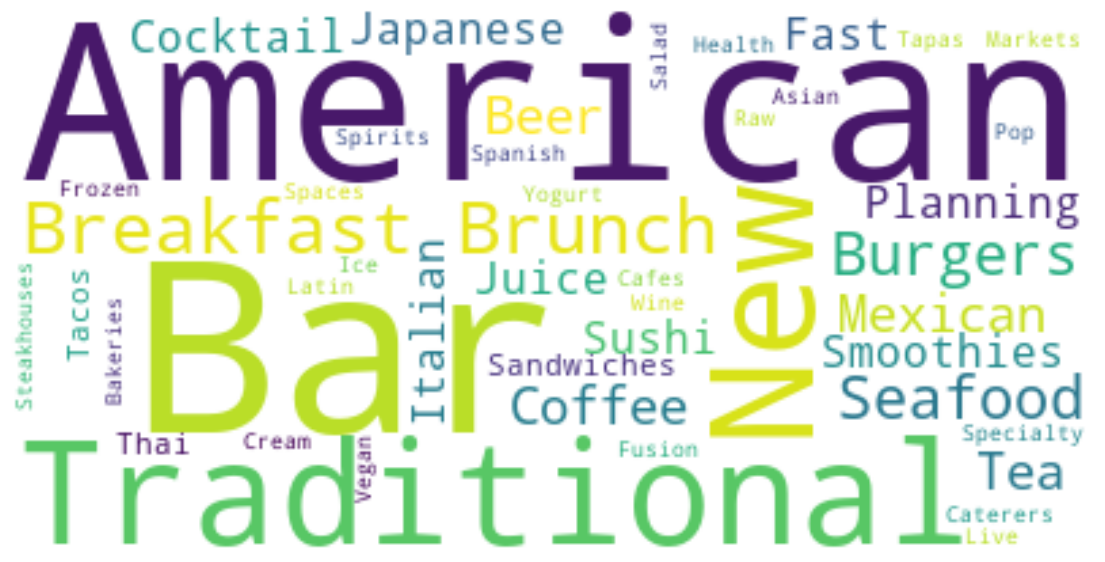

In [40]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(category_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
df_recsys = df_clean[['user_id', 'business_id', 'stars', 'name']]

print(df_recsys.shape)
df_recsys.head()

(3031, 4)


,user_id,business_id,stars,name
0,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,Hibachi Steak House & Sushi Bar
1,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,Hibachi Steak House & Sushi Bar
2,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,Hibachi Steak House & Sushi Bar
3,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,Hibachi Steak House & Sushi Bar
4,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,Hibachi Steak House & Sushi Bar


In [43]:
df_recsys.to_csv('./data/sb_restaurants_clean.csv')